In [104]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [105]:
def load_results(path, ranks=[10,100], gamma1=[0.5,1], gamma2=[0.5,1]):
    data = pd.read_csv(path, header=None)
    column_names = ["active", "network", "n_query", "n_passage"]
    for rank in ranks:
        for g1 in gamma1:
            for g2 in gamma2:
                column_names.append("Rank{}_forward_p_{}_reverse_p_{}".format(rank, g1, g2))
    for rank in ranks:
        for g1 in gamma1:
            for g2 in gamma2:
                column_names.append("Baseline_Rank{}_forward_p_{}_reverse_p_{}".format(rank, g1, g2))
    data.columns = column_names
    return data

In [115]:
# Genearte active learning plot
def active_learning(data, selected=[0,10,15,17,18,19,20,21,22,23,24]):
    data = data[["active", "network", "n_query", "n_passage",
            "Rank10_forward_p_0.5_reverse_p_1", "Rank10_forward_p_1_reverse_p_1",
            "Rank100_forward_p_0.5_reverse_p_1", "Rank100_forward_p_1_reverse_p_1"]]
    data = data.iloc[selected]
    return data
def load_training_loss(path_list):
    all_results = []
    for path in path_list:
        temp = pd.read_csv(path, header=None)
        temp = list(temp.iloc[:,1])
        all_results.append(temp)
    return all_results

In [107]:
def plot_active_learning(loss, data):
    labels = ["No Active Learning", "Active Learning Stage 1", 
              "Active Learning Stage 2", "Active Learning Stage 3"]
    losses = []
    for l in loss:
        losses += l
    evals = list(data["Rank10_forward_p_0.5_reverse_p_1"])
    plt.plot(np.arange(1,len(losses)+1), np.array(losses))
    plt.show()

In [108]:
def main_results_table(data, selected=[0,1,16,17,-1]):
    evals = [data['Baseline_Rank10_forward_p_0.5_reverse_p_1'][0], 
            data['Baseline_Rank10_forward_p_1_reverse_p_1'][0],
            data['Baseline_Rank100_forward_p_0.5_reverse_p_1'][0],
            data['Baseline_Rank100_forward_p_1_reverse_p_1'][0]]
    data = data[["active", "network", "n_query", "n_passage",
            "Rank10_forward_p_0.5_reverse_p_1", "Rank10_forward_p_1_reverse_p_1",
            "Rank100_forward_p_0.5_reverse_p_1", "Rank100_forward_p_1_reverse_p_1"]]
    data = data.append({'active' : 'no_active' , 'network' : 'baseline', 'n_query': 50000, 
                'n_passage': 250000, 'Rank10_forward_p_0.5_reverse_p_1':evals[0],
                'Rank10_forward_p_1_reverse_p_1':evals[1],
                'Rank100_forward_p_0.5_reverse_p_1':evals[2],
                'Rank100_forward_p_1_reverse_p_1':evals[3]} , 
                ignore_index=True)
    data = data.iloc[selected]
    data
    return data

In [119]:
def pq_table(data):
    data = data[["active", "network", "n_query", "n_passage",
            "Rank10_forward_p_0.5_reverse_p_1", "Rank10_forward_p_1_reverse_p_1",
            "Rank100_forward_p_0.5_reverse_p_1", "Rank100_forward_p_1_reverse_p_1"]]
    data = data[data.active == "no_active"]
    data = data[data.network == "residual"]
    return data

In [153]:
all_results = load_results("/datadrive/ruohan/final_deliverable/all_results.csv")

In [154]:
all_results

,active,network,n_query,n_passage,Rank10_forward_p_0.5_reverse_p_0.5,Rank10_forward_p_0.5_reverse_p_1,Rank10_forward_p_1_reverse_p_0.5,Rank10_forward_p_1_reverse_p_1,Rank100_forward_p_0.5_reverse_p_0.5,Rank100_forward_p_0.5_reverse_p_1,Rank100_forward_p_1_reverse_p_0.5,Rank100_forward_p_1_reverse_p_1,Baseline_Rank10_forward_p_0.5_reverse_p_0.5,Baseline_Rank10_forward_p_0.5_reverse_p_1,Baseline_Rank10_forward_p_1_reverse_p_0.5,Baseline_Rank10_forward_p_1_reverse_p_1,Baseline_Rank100_forward_p_0.5_reverse_p_0.5,Baseline_Rank100_forward_p_0.5_reverse_p_1,Baseline_Rank100_forward_p_1_reverse_p_0.5,Baseline_Rank100_forward_p_1_reverse_p_1
0,no_active,residual,50000,200000,0.632510,0.913484,0.790780,0.831914,0.632526,0.996671,0.790775,0.983808,0.493129,0.753408,0.642068,0.655149,0.49315,0.937152,0.642047,0.887489
1,no_active,append,50000,200000,0.623855,0.903033,0.780452,0.821561,0.623872,0.996095,0.780447,0.981951,0.493129,0.753408,0.642068,0.655149,0.49315,0.937152,0.642047,0.887489
2,no_active,residual,250000,200000,0.684819,0.944013,0.843435,0.883884,0.684832,0.999296,0.843431,0.993122,0.493129,0.753408,0.642068,0.655149,0.49315,0.937152,0.642047,0.887489
3,no_active,append,250000,200000,0.659568,0.925650,0.818314,0.858414,0.659583,0.997517,0.818307,0.987788,0.493129,0.753408,0.642068,0.655149,0.49315,0.937152,0.642047,0.887489
4,no_active,residual,500000,200000,0.696275,0.950592,0.854308,0.893651,0.696286,0.999669,0.854301,0.994256,0.493129,0.753408,0.642068,0.655149,0.49315,0.937152,0.642047,0.887489
5,no_active,append,500000,200000,0.661020,0.929533,0.819918,0.861440,0.661034,0.997949,0.819909,0.988613,0.493129,0.753408,0.642068,0.655149,0.49315,0.937152,0.642047,0.887489
6,stage_1,append,50000,200000,0.611449,0.902855,0.765446,0.816325,0.611465,0.996134,0.765440,0.981399,0.493129,0.753408,0.642068,0.655149,0.49315,0.937152,0.642047,0.887489
7,stage_1,residual,50000,200000,0.634402,0.916441,0.793214,0.838134,0.634417,0.997120,0.793209,0.985789,0.493129,0.753408,0.642068,0.655149,0.49315,0.937152,0.642047,0.887489
8,stage_2,append,50000,200000,0.611556,0.899524,0.764912,0.814709,0.611574,0.996165,0.764909,0.981155,0.493129,0.753408,0.642068,0.655149,0.49315,0.937152,0.642047,0.887489
9,stage_2,residual,50000,200000,0.622101,0.906728,0.780751,0.825307,0.622119,0.995953,0.780748,0.982589,0.493129,0.753408,0.642068,0.655149,0.49315,0.937152,0.642047,0.887489


In [111]:
main_results_table(all_results)

,active,network,n_query,n_passage,Rank10_forward_p_0.5_reverse_p_1,Rank10_forward_p_1_reverse_p_1,Rank100_forward_p_0.5_reverse_p_1,Rank100_forward_p_1_reverse_p_1
0,no_active,residual,50000,200000,0.913484,0.831914,0.996671,0.983808
1,no_active,append,50000,200000,0.903033,0.821561,0.996095,0.981951
16,stage_3,append,50000,200000,0.905028,0.823461,0.996167,0.982748
17,stage_3,residual,50000,200000,0.921650,0.846940,0.997645,0.987718
31,no_active,baseline,50000,250000,0.753408,0.655149,0.937152,0.887489


In [116]:
residual_active = active_learning(all_results)

In [117]:
residual_active

,active,network,n_query,n_passage,Rank10_forward_p_0.5_reverse_p_1,Rank10_forward_p_1_reverse_p_1,Rank100_forward_p_0.5_reverse_p_1,Rank100_forward_p_1_reverse_p_1
0,no_active,residual,50000,200000,0.913484,0.831914,0.996671,0.983808
10,stage_1,residual,50000,200000,0.918216,0.843193,0.997818,0.987195
15,stage_2,residual,50000,200000,0.919435,0.843345,0.998180,0.987267
17,stage_3,residual,50000,200000,0.921650,0.846940,0.997645,0.987718
18,stage_4,residual,50000,200000,0.917776,0.841165,0.997234,0.986523
19,stage_5,residual,50000,200000,0.914406,0.833287,0.997059,0.984536
20,stage_6,residual,50000,200000,0.918237,0.838896,0.996805,0.985953
21,stage_7,residual,50000,200000,0.916251,0.838631,0.996556,0.985586
22,stage_8,residual,50000,200000,0.917850,0.838717,0.996752,0.985931
23,stage_9,residual,50000,200000,0.918600,0.839651,0.997180,0.985984


In [118]:
append_active = active_learning(all_results, [1,13,14,16])
append_active

,active,network,n_query,n_passage,Rank10_forward_p_0.5_reverse_p_1,Rank10_forward_p_1_reverse_p_1,Rank100_forward_p_0.5_reverse_p_1,Rank100_forward_p_1_reverse_p_1
1,no_active,append,50000,200000,0.903033,0.821561,0.996095,0.981951
13,stage_1,append,50000,200000,0.902321,0.817979,0.996261,0.982106
14,stage_2,append,50000,200000,0.906286,0.821156,0.996209,0.982212
16,stage_3,append,50000,200000,0.905028,0.823461,0.996167,0.982748


In [41]:
all_training_loss = load_training_loss(["/datadrive/ruohan/final_models/no_active_residual_50000_query_200000_passage.csv",
                                       "/datadrive/ruohan/active_learning/stage_1_residual_50000_query_200000_passage.csv",
                                       "/datadrive/ruohan/active_learning/stage_2_residual_50000_query_200000_passage.csv",
                                       "/datadrive/ruohan/active_learning/stage_3_residual_50000_query_200000_passage.csv"])

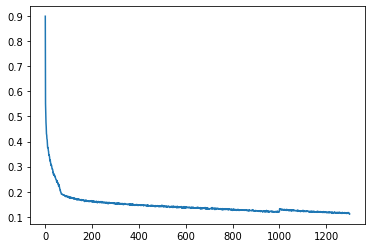

In [54]:
plot_active_learning(all_training_loss, residual_active)

In [124]:
pq = pq_table(all_results).sort_values("n_query")
pq

,active,network,n_query,n_passage,Rank10_forward_p_0.5_reverse_p_1,Rank10_forward_p_1_reverse_p_1,Rank100_forward_p_0.5_reverse_p_1,Rank100_forward_p_1_reverse_p_1
0,no_active,residual,50000,200000,0.913484,0.831914,0.996671,0.983808
25,no_active,residual,50000,400000,0.931727,0.860302,0.998491,0.989368
26,no_active,residual,50000,600000,0.934023,0.867454,0.998992,0.991275
2,no_active,residual,250000,200000,0.944013,0.883884,0.999296,0.993122
27,no_active,residual,250000,400000,0.949481,0.891529,0.999603,0.994201
28,no_active,residual,250000,600000,0.952747,0.895215,0.999619,0.994679
4,no_active,residual,500000,200000,0.950592,0.893651,0.999669,0.994256
29,no_active,residual,500000,400000,0.953602,0.896763,0.999629,0.994470
30,no_active,residual,500000,600000,0.953770,0.899073,0.999847,0.995104


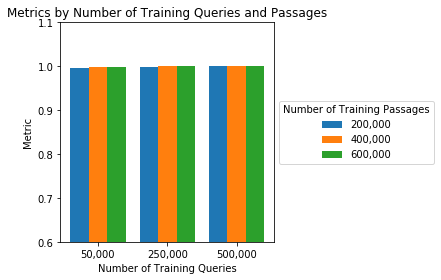

In [156]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['50,000', '250,000', '500,000']
p2 = list(pq[pq.n_passage == 200000]["Rank100_forward_p_0.5_reverse_p_1"])
p4 = list(pq[pq.n_passage == 400000]["Rank100_forward_p_0.5_reverse_p_1"])
p6 = list(pq[pq.n_passage == 600000]["Rank100_forward_p_0.5_reverse_p_1"])

x = np.arange(len(labels))  # the label locations
width = 0.8  # the width of the bars

fig, ax = plt.subplots()
rects2 = ax.bar(x - width/3, p2, width/3, label='200,000')
rects4 = ax.bar(x, p4, width/3, label='400,000')
rects6 = ax.bar(x + width/3, p6, width/3, label='600,000')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Metric')
ax.set_xlabel("Number of Training Queries")
ax.set_title('Metrics by Number of Training Queries and Passages')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim([0.6,1.1])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Number of Training Passages")


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 4),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


# autolabel(rects2)
# autolabel(rects4)
# autolabel(rects4)

fig.tight_layout()

plt.show()

# Density Comparison Plot

In [2]:
import sys
sys.path.insert(0, '../active_metric_learning/')
from util import obj_reader

In [3]:
# load final evaluation
results = obj_reader("/datadrive/ruohan/final_evaluation/no_active_residual_50000_query_200000_passage.dict")

In [4]:
baseline_rank = results["forward_baseline_rank_test"]
residual_rank = results["pred_rank_test"]

In [5]:
candidates = set(baseline_rank.keys())

In [6]:
def load_true_dict_test(candidates, k = 100, path = "/datadrive/jianx/data/results/all_search_rankings_100_100_flat.csv"):
    true_dict = {}
    with open(path, "r") as file:
        for line in file:
            qid = int(line.split(",")[0])
            pid = int(line.split(",")[1])
            rank = int(line.split(",")[2])
            if pid not in candidates:
                continue
            if rank > k:
                continue
            if pid not in true_dict.keys():
                true_dict[pid] = {}
            true_dict[pid][qid] = rank
    return true_dict

In [7]:
true_dict_100 = load_true_dict_test(candidates=candidates)

In [12]:
# true_dict_100.keys()

In [178]:
pid = 6701237

In [179]:
true_dict_100[pid]

{377460: 71,
 170757: 33,
 368928: 75,
 378137: 42,
 367557: 68,
 80596: 78,
 355308: 65,
 369572: 98,
 967847: 97,
 350498: 61,
 350510: 65,
 79616: 28,
 75862: 56,
 560392: 58,
 862108: 47,
 908218: 10,
 51872: 46,
 80935: 64}

In [219]:
baseline_rank[pid]

{272185: 0,
 272392: 0,
 378137: 42,
 908218: 10,
 560392: 58,
 376140: 0,
 227112: 0,
 266891: 0,
 908021: 0,
 350510: 65,
 80935: 64,
 266607: 0,
 302010: 0,
 386002: 0,
 80919: 0,
 291246: 0,
 170757: 33,
 302639: 0,
 956369: 0,
 350621: 0,
 888915: 0,
 371189: 0,
 355308: 65,
 483881: 0,
 113630: 0,
 76470: 0,
 499722: 0,
 380765: 0,
 243167: 0,
 330319: 0,
 376500: 0,
 350805: 0,
 596940: 0,
 354114: 0,
 368928: 75,
 282655: 0,
 350669: 0,
 906136: 0,
 19450: 0,
 242424: 0,
 386139: 0,
 301991: 0,
 329877: 0,
 248688: 0,
 1145393: 0,
 228586: 0,
 659837: 0,
 350482: 0,
 75338: 0,
 870613: 0,
 430886: 0,
 350830: 0,
 9856: 0,
 925071: 0,
 75862: 56,
 367557: 68,
 273604: 0,
 248434: 0,
 388943: 0,
 843354: 0,
 302550: 0,
 945090: 0,
 350616: 0,
 267936: 0,
 656174: 0,
 242056: 0,
 368790: 0,
 896232: 0,
 537167: 0,
 862108: 47,
 808767: 0,
 414637: 0,
 350694: 0,
 370851: 0,
 906137: 0,
 582971: 0,
 350542: 0,
 291155: 0,
 503780: 0,
 1148186: 0,
 248821: 0,
 369572: 98,
 888914: 0

In [218]:
residual_rank[pid]

{350510: 65,
 170757: 33,
 368928: 75,
 560392: 58,
 80919: 0,
 367753: 0,
 62720: 0,
 377460: 71,
 368790: 0,
 80935: 64,
 361491: 0,
 367557: 68,
 376140: 0,
 9856: 0,
 582971: 0,
 430886: 0,
 15252: 0,
 908021: 0,
 362655: 0,
 75862: 56,
 388943: 0,
 51872: 46,
 369572: 98,
 76470: 0,
 378137: 42,
 362240: 0,
 886666: 0,
 355308: 65,
 385582: 0,
 386148: 0,
 376500: 0,
 908218: 10,
 385198: 0,
 862108: 47,
 888915: 0,
 80596: 78,
 350805: 0,
 224490: 0,
 368811: 0,
 80467: 0,
 386139: 0,
 888876: 0,
 350720: 0,
 375994: 0,
 227112: 0,
 369264: 0,
 385608: 0,
 79311: 0,
 870613: 0,
 370031: 0,
 272185: 0,
 69953: 0,
 350669: 0,
 380433: 0,
 272392: 0,
 386002: 0,
 219025: 0,
 369857: 0,
 350621: 0,
 350830: 0,
 496896: 0,
 956369: 0,
 291246: 0,
 375739: 0,
 69978: 0,
 758055: 0,
 80921: 0,
 80918: 0,
 350541: 0,
 1044319: 0,
 634821: 0,
 1005385: 0,
 386135: 0,
 350733: 0,
 159751: 0,
 450734: 0,
 371189: 0,
 870618: 0,
 376293: 0,
 19450: 0,
 376366: 0,
 385348: 0,
 350482: 0,
 738

In [8]:
from testing import load_true_dict, transform_np_transformation, delete_zeros
import faiss
import torch
from network import AppendNet, ResidualNet
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from util import obj_writer, obj_reader
import csv
import numpy as np

In [300]:
tt_net = AppendNet(32,384,3,0.1)

In [301]:
tt_net.parameter_count()

605600

In [251]:
tt_residual = ResidualNet(768,384,1,0.1)

In [253]:
tt_residual.parameter_count()

591744

In [9]:
current_device = "cuda:3"

PASSAGE_NP_PATH = "/home/jianx/results/passage_0__emb_p__data_obj_0.pb"
PASSAGE_MAP_PATH = "/datadrive/jianx/data/annoy/100_ance_passage_map.dict"
QUERY_TRAIN_NP_PATH = "/home/jianx/results/query_0__emb_p__data_obj_0.pb"
QUERY_TEST_NP_PATH = "/home/jianx/results/test_query_0__emb_p__data_obj_0.pb"
QUERY_MAP_PATH = "/datadrive/jianx/data/annoy/100_ance_query_train_map.dict"
TRUE_PATH = "/datadrive/jianx/data/results/all_search_rankings_100_100_flat.csv"
QUERY_DEV_NP_PATH = "/home/jianx/results/dev_query_0__emb_p__data_obj_0.pb"

TRAIN_RANK_PATH = "/datadrive/jianx/data/train_data/ance_testing_rank100_nqueries50000_20000_Sep_03_22:56:31.csv"
REVERSE_RANKER_PATH = "/datadrive/ruohan/final_models/no_active_residual_50000_query_200000_passage.model"

print("Load passages.")
passage_np = obj_reader(PASSAGE_NP_PATH)
pid_mapping = obj_reader(PASSAGE_MAP_PATH)
print("Load queries.")
query_np = obj_reader(QUERY_TRAIN_NP_PATH)
qid_mapping = obj_reader(QUERY_MAP_PATH)
print("Load pre-processed results.")
# true_dict_100 = load_true_dict(k=100)
pid_reverse_mapping = {v: k for k, v in pid_mapping.items()}

Load passages.
Load queries.
Load pre-processed results.


In [10]:
def save_new_np(path, query_np, passage_np, current_device="cuda:3", output_path="/datadrive/ruohan/final_np/"):
    # Load model
    checkpoint = torch.load(path)
    network_type = checkpoint['network_type']
    embed_size = checkpoint['embed_size']
    num_hidden_nodes = checkpoint['num_hidden_nodes']
    num_hidden_layers = checkpoint['num_hidden_layers']
    dropout_rate = checkpoint['dropout_rate']
    num_query = checkpoint['num_query']
    num_passage = checkpoint['num_passage']
    if network_type == "append":
        net = AppendNet(embed_size=embed_size, num_hidden_nodes=num_hidden_nodes, 
                        num_hidden_layers=num_hidden_layers, dropout_rate=dropout_rate)
    if network_type == "residual":
        net = ResidualNet(embed_size=embed_size, num_hidden_nodes=num_hidden_nodes, 
                        num_hidden_layers=num_hidden_layers, dropout_rate=dropout_rate)
    net.load_state_dict(checkpoint['model'])
    net.to(current_device)
    net.eval()  
    # Transform original np
    query_new_np = transform_np_transformation(query_np, net, current_device)
    passage_new_np = transform_np_transformation(passage_np, net, current_device)
    unique_path = str(num_query) + "_" 
    obj_writer(query_new_np, output_path+unique_path+"query.np")
    obj_writer(passage_new_np, output_path+unique_path+"passage.np")

In [11]:
def generate_test_pids_np(results, output_path="/datadrive/ruohan/final_np/test_pids.np"):
    baseline_rank = results["forward_baseline_rank_test"]
    all_pids = set(baseline_rank.keys())
    output_pids = []
    for pid in all_pids:
        output_pids.append(pid_reverse_mapping[pid])
    output_pids = np.array(output_pids)
    print(output_pids)
    obj_writer(output_pids, output_path)

In [556]:
generate_test_pids_np(results, output_path="/datadrive/ruohan/final_np/test_pids.np")

[3309713 3450852 3665719 ... 5689979 7752979 8078438]


In [539]:
save_new_np("/datadrive/ruohan/final_models/no_active_residual_50000_query_200000_passage.model", query_np, passage_np)

(502939, 768)
(8841823, 768)


In [540]:
save_new_np("/datadrive/ruohan/final_models/no_active_residual_250000_query_200000_passage.model", query_np, passage_np)

(502939, 768)
(8841823, 768)


In [13]:
save_new_np("/datadrive/ruohan/final_models/no_active_residual_150000_query_200000_passage.model", query_np, passage_np)

(502939, 768)
(8841823, 768)


In [14]:
save_new_np("/datadrive/ruohan/final_models/no_active_residual_350000_query_200000_passage.model", query_np, passage_np)

(502939, 768)
(8841823, 768)


In [15]:
save_new_np("/datadrive/ruohan/final_models/no_active_residual_450000_query_200000_passage.model", query_np, passage_np)

(502939, 768)
(8841823, 768)


In [23]:
# Load model
checkpoint = torch.load(REVERSE_RANKER_PATH)
network_type = checkpoint['network_type']
embed_size = checkpoint['embed_size']
num_hidden_nodes = checkpoint['num_hidden_nodes']
num_hidden_layers = checkpoint['num_hidden_layers']
dropout_rate = checkpoint['dropout_rate']
num_query = checkpoint['num_query']
num_passage = checkpoint['num_passage']
if network_type == "append":
    net = AppendNet(embed_size=embed_size, num_hidden_nodes=num_hidden_nodes, 
                    num_hidden_layers=num_hidden_layers, dropout_rate=dropout_rate)
if network_type == "residual":
    net = ResidualNet(embed_size=embed_size, num_hidden_nodes=num_hidden_nodes, 
                    num_hidden_layers=num_hidden_layers, dropout_rate=dropout_rate)
net.load_state_dict(checkpoint['model'])
net.to(current_device)
net.eval()

# Data preparation
query_new_np = transform_np_transformation(query_np, net, current_device)
passage_new_np = transform_np_transformation(passage_np, net, current_device)
dim = query_new_np.shape[1]
query_index = faiss.IndexFlatIP(dim)
query_index.add(query_new_np)

(502939, 768)
(8841823, 768)


In [16]:
qid_reverse_mapping = {v: k for k, v in qid_mapping.items()}

In [228]:
query_index_baseline = faiss.IndexFlatIP(dim)
query_index_baseline.add(query_np)

In [221]:
pid = 6701237
pid_map = pid_reverse_mapping[pid]

In [222]:
# reverse ranker
distance_residual, near_qids = query_index.search(np.array([passage_new_np[pid_map,:]]),100)

In [229]:
# baseline model
distance_baseline, near_qids_baseline = query_index_baseline.search(np.array([passage_np[pid_map,:]]),100)

In [16]:
def find_example(results, true_dict):
    baseline_rank = results["forward_baseline_rank_test"]
    residual_rank = results["pred_rank_test"]   
    diff = 0
    example = None
    for pid, ranks in baseline_rank.items():
        total = len(true_dict.get(pid, []))
        base = len(delete_zeros(ranks))
        residual = len(delete_zeros(residual_rank[pid]))
        if base > total or residual > total:
            print("Error")
#         print(residual - base)
        if residual - base < 0:
            print(pid, residual-base)
            example = pid
            diff = residual - base
    return example, diff

In [17]:
find_example(results, true_dict_100)

2883491 -3
5071514 -1
7223372 -1
7142659 -1
7040127 -1
6715844 -8
7532094 -1
1664582 -1
6148568 -1
2747405 -1
7512149 -2
2912822 -2
7800802 -1
4637449 -1
3077087 -1
39434 -1
8582163 -1
7921602 -1
2641495 -1
601353 -1
2882756 -2
2912324 -1
5533722 -1
8487169 -1
6020985 -2
7756908 -1
3688853 -1
3925474 -1
7385165 -1
6440070 -1
2303366 -1
8430731 -1
1979664 -1
1597393 -1
6209767 -1
1317682 -1
1449531 -1
5886952 -1
7931798 -1
6018449 -1
7540279 -1
4261973 -1
2700678 -1
3724397 -1
1012851 -1
6461447 -1
3756397 -1
1963825 -1
6308954 -1
5514272 -1
3523287 -2
5823122 -1
6747056 -1
3842980 -1
224972 -1
112195 -2
5478643 -1
4522604 -1
2845497 -2
6505073 -1
6517073 -1
5628819 -1
3404344 -4
593429 -1
4832437 -1
5972672 -1
432803 -1
4370861 -1
6185321 -1
5537085 -1
1569034 -1
5799274 -1
6409042 -1
4733151 -1
7481177 -1
3175792 -1
6126780 -1
5797121 -3
1539261 -2
4294711 -1
1979091 -1
5726292 -1
1197854 -1
1025932 -1
613773 -1
5297004 -1
1563819 -1
2715291 -1
1127020 -1
1180140 -1
5366819 -1
955894 

(8718331, -3)

In [23]:
def keep_zeros(myDict):
    out_dict = {key:val for key, val in myDict.items() if val == 0}
    return set(list(out_dict.keys()))

In [38]:
def output_tsne_data(query_new_np, passage_new_np, passage_np, pid, true_dict, results, output_path, passage_index_baseline, passage_index_residual):
    # 0: seed passage, 1: exposing queries, 2: other queries, 3: other passages
    # Load baseline, residual model results
    baseline_rank = results["forward_baseline_rank_test"]
    residual_rank = results["pred_rank_test"]  
    baseline_set = keep_zeros(baseline_rank[pid])
    residual_set = keep_zeros(residual_rank[pid])
    # construct passage index
    print("Begin search")
    pid_map = pid_reverse_mapping[pid]
    _, near_p_baseline = passage_index_baseline.search(np.array([passage_np[pid_map]]),100)
    _, near_p_residual = passage_index_residual.search(np.array([passage_new_np[pid_map]]),100)
    # Start writing file
    print("Start writing")
    with open(output_path, mode='a+') as output:
        output_writer = csv.writer(output)
        # write seed passage
        seed_passage = [0] + list(passage_np[pid_map]) + list(passage_new_np[pid_map])
        output_writer.writerow(seed_passage)
        # write exposing queries
        expose_qids = true_dict[pid]
        for qid, _ in expose_qids.items():
            qid_map = qid_reverse_mapping[qid]
            expose_q = [1] + list(query_np[qid_map]) + list(query_new_np[qid_map])
            output_writer.writerow(expose_q)
        # write other queries
        for qid in baseline_set:
            qid_map = qid_reverse_mapping[qid]
            other_q = [2] + list(query_np[qid_map]) + list(query_new_np[qid_map])
            output_writer.writerow(other_q)   
        for qid in residual_set:
            qid_map = qid_reverse_mapping[qid]
            other_q = [2] + list(query_np[qid_map]) + list(query_new_np[qid_map])
            output_writer.writerow(other_q)
        # write nearest passages
        for p in near_p_baseline[0]:
            other_p = [3] + list(passage_np[p]) + list(passage_new_np[p])
            output_writer.writerow(other_p)
        for p in near_p_residual[0]:
            other_p = [3] + list(passage_np[p]) + list(passage_new_np[p])
            output_writer.writerow(other_p)

In [39]:
passage_index_baseline = faiss.IndexFlatIP(passage_np.shape[1])
passage_index_baseline.add(passage_np)
passage_index_residual = faiss.IndexFlatIP(passage_new_np.shape[1])
passage_index_residual.add(passage_new_np)

In [41]:
seed_passages = [7878306, 3146976, 4440976, 2924955, 8640196]
for seed_p in seed_passages:
    output_tsne_data(query_new_np, passage_new_np, passage_np, seed_p, true_dict_100, results, 
                     '/datadrive/ruohan/tsne_data/'+str(seed_p)+".csv", passage_index_baseline, passage_index_residual)

Begin search
Start writing
Begin search
Start writing
Begin search
Start writing
Begin search
Start writing
Begin search
Start writing


In [254]:
def cumulative_counts(labels, distance):
    cum_baseline = []
    xaxis = []
    count = 0
    i = 0
    max_dist = np.max(distance)
    for qid, rank in labels.items():
        if rank != 0:
            count += 1
        xaxis.append(-distance[i]/max_dist)
        cum_baseline.append(count)
        i += 1
    return xaxis, cum_baseline

In [364]:
def similarity_rank(labels, distance):
    similarity = []
    xaxis = []
    max_dist = np.max(distance)
    min_dist = np.min(distance)
    expose_x = []
    expose_y = []
    i=0
    for qid, rank in labels.items():
        if rank > 0:
            expose_x.append(i)
            expose_y.append((max_dist-distance[i])/(max_dist-min_dist))
        similarity.append((max_dist-distance[i])/(max_dist-min_dist))
        i += 1
    return similarity, expose_x, expose_y

In [490]:
def all_exposing(allqids, distance, pid, baseline, residual, true_dict=true_dict_100):
    similarity = []
    xaxis = []
    max_dist = np.max(distance)
    min_dist = np.min(distance)
    allset = delete_zeros(true_dict[pid])
    base_set = delete_zeros(baseline)
    residual_set = delete_zeros(residual)
    newly_found = residual_set - base_set
    remain = allset-residual_set
    expose_x = []
    expose_y = []
    new_x = []
    new_y = []
    remain_x = []
    remain_y = []
    i=0
    for q in allqids:
        qid = qid_mapping[q]
        if qid in base_set:
            expose_x.append(i)
            expose_y.append((max_dist-distance[i])/(max_dist-min_dist))
        elif qid in newly_found:
            new_x.append(i)
            new_y.append((max_dist-distance[i])/(max_dist-min_dist))
        elif qid in remain:
            remain_x.append(i)
            remain_y.append((max_dist-distance[i])/(max_dist-min_dist))
        similarity.append((max_dist-distance[i])/(max_dist-min_dist))
        i += 1
    return similarity, expose_x, expose_y, new_x, new_y, remain_x, remain_y   

In [530]:
def visualization(pid, pid_reverse_mapping, qid_mapping, query_index, query_index_baseline, results, n):
    baseline_rank = results["forward_baseline_rank_test"]
    residual_rank = results["pred_rank_test"]
    baseline_labels = baseline_rank[pid]
    residual_labels = residual_rank[pid]
    pid_map = pid_reverse_mapping[pid]
    distance_residual, near_qids = query_index.search(np.array([passage_new_np[pid_map,:]]),n)
    distance_baseline, near_qids_baseline = query_index_baseline.search(np.array([passage_np[pid_map,:]]),n)
#     plt.hist(-distance_residual[0])
    x,y = cumulative_counts(residual_labels, distance_residual[0])
    plt.plot(x,y, label="residual")
#     plt.show()
#     plt.hist(-distance_baseline[0])
    x,y = cumulative_counts(baseline_labels, distance_baseline[0])
    plt.plot(x,y, label="baseline")
    plt.legend()
    plt.show()
    plt.hist(-distance_residual[0],bins=20)
    plt.show()
    plt.hist(-distance_baseline[0],bins=20)
    plt.show()
    # similarity vs. reverse rank
    s, expose_x, expose_y = similarity_rank(residual_labels, distance_residual[0])
    plt.plot([i for i in range(len(s))],s,label="Residual Model")
    plt.scatter(expose_x, expose_y, label="Exposing Queries\nby Residual Model", marker="x")
#     plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#     plt.show()
    s, expose_x, expose_y = similarity_rank(baseline_labels, distance_baseline[0])
    plt.plot([i for i in range(len(s))],s,label="Baseline Model")
    plt.scatter(expose_x, expose_y, label="Exposing Queries\nby Baseline Model", marker="x")
#     plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.legend()
    plt.xlabel("Retrieval Rank of Queries in Response to Passage")
    plt.ylabel("Similarity")
    plt.savefig("/datadrive/ruohan/final_deliverable/distribution_shift_100.png", dpi=1200)
    plt.show()
    # Where are the newly exposing queries
    
    
    distance_baseline, near_qids_baseline = query_index_baseline.search(np.array([passage_np[pid_map,:]]),1400)
    similarity, expose_x, expose_y, new_x, new_y, remain_x, remain_y = all_exposing(near_qids_baseline[0], 
                                                        distance_baseline[0], pid, baseline_labels, residual_labels)
    print(len(new_x))
    print(len(remain_x))
    plt.plot([i for i in range(len(similarity))],similarity,label="Forward Embedding Space")
    plt.scatter(expose_x, expose_y, label="Exposing Queries\nby Baseline Model", marker="x",s=60)
    plt.scatter(new_x, new_y, label="Newly Found Exposing\nQueries by Residual Model", marker="x",s=60)
    plt.scatter(remain_x, remain_y, label="Remaining Exposing Queries", marker="x",s=60)
    plt.xlabel("Retrieval Rank of Queries in Response to Passage")
    plt.ylabel("Similarity")
    plt.legend()
    plt.savefig("/datadrive/ruohan/final_deliverable/distribution_shift_1400_forward.png", dpi=1200)
    plt.show()
    
    distance_baseline, near_qids_baseline = query_index.search(np.array([passage_new_np[pid_map,:]]),1400)
    similarity, expose_x, expose_y, new_x, new_y, remain_x, remain_y = all_exposing(near_qids_baseline[0], 
                                                        distance_baseline[0], pid, baseline_labels, residual_labels)
    print(len(new_x))
    print(len(remain_x))
    plt.plot([i for i in range(len(similarity))],similarity,label="Reverse Embedding Space")
    plt.scatter(expose_x, expose_y, label="Exposing Queries\nby Baseline Model", marker="x",s=60)
    plt.scatter(new_x, new_y, label="Newly Found Exposing\nQueries by Residual Model", marker="x",s=60)
    plt.scatter(remain_x, remain_y, label="Remaining Exposing Queries", marker="x",s=60)
    
    plt.xlabel("Retrieval Rank of Queries in Response to Passage")
    plt.ylabel("Similarity")
    plt.legend()
    plt.savefig("/datadrive/ruohan/final_deliverable/distribution_shift_1400_reverse.png", dpi=1200)
    plt.show()

In [371]:
def construct_pca(query, passage):
    all_embeddings = np.concatenate((passage, query), axis = 0)
    pca = PCA(n_components=2)
    pca.fit(all_embeddings)
    all_embeddings_pca = pca.transform(all_embeddings)
    passages_pca = all_embeddings_pca[:passage.shape[0],:]
    queries_pca = all_embeddings_pca[query.shape[0]:,:]
    return queries_pca, passages_pca

In [304]:
query_pca_baseline, passages_pca_baseline = construct_pca(query_np, passage_np)

In [305]:
query_pca_residual, passages_pca_residual = construct_pca(query_new_np, passage_new_np)

In [336]:
def extract_near_expose(ranking, true_rank):
    near = []
    expose = []
    for qid, rank in ranking.items():
        qid_map = qid_reverse_mapping[qid]
        near.append(qid_map)
        if rank > 0:
            expose.append(qid_map)
#     for qid, _ in true_rank.items():
#         expose.append(qid_reverse_mapping[qid])
    return near, expose

In [353]:
def pca_visualization(query_pca_baseline, passages_pca_baseline, query_pca_residual, passages_pca_residual, pid, results, true_dict_100):
    pid_map = pid_reverse_mapping[pid]
    base_p = passages_pca_baseline[pid_map,:]
    residual_p = passages_pca_residual[pid_map,:]
    baseline_rank = results["forward_baseline_rank_test"]
    residual_rank = results["pred_rank_test"]
    baseline_labels = baseline_rank[pid]
    residual_labels = residual_rank[pid]
    print(len(delete_zeros(baseline_labels)))
    print(len(delete_zeros(residual_labels)))
    true_rank = true_dict_100[pid]
    near_base, expose_base = extract_near_expose(baseline_labels, true_rank)
    near_residual, expose_residual = extract_near_expose(residual_labels, true_rank)
    print(len(expose_base))
    print(len(expose_residual))
    # Baseline
    plt.scatter(base_p[0],base_p[1], marker="*",label="Passage",s=100)
    plt.scatter(query_pca_baseline[near_base,0], 
                query_pca_baseline[near_base,1], marker="_", 
                label="Nearest Queries",s=100)
    plt.scatter(query_pca_baseline[expose_residual,0],
                query_pca_baseline[expose_residual,1], 
                marker="|", label="Exposing Queries",s=100)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    # Residual Model
#     plt.xlim((-4,4))
#     plt.ylim((-4,4))
    plt.scatter(residual_p[0],residual_p[1], marker="*",label="Passage",s=100)
    plt.scatter(query_pca_residual[near_residual,0], 
                query_pca_residual[near_residual,1], marker="_", 
                label="Nearest Queries",s=100)
    plt.scatter(query_pca_residual[expose_residual,0],
                query_pca_residual[expose_residual,1], 
                marker="|", label="Exposing Queries",s=100)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

In [412]:
def compute_exposure_sets(results, true_dict):
    baseline_rank = results["forward_baseline_rank_test"]
    residual_rank = results["pred_rank_test"]
    diff_size = []
    total_size = []
    for pid, ranks in baseline_rank.items():
        total = len(true_dict.get(pid, []))
        if total == 0:
            continue
        diff_size.append(len(delete_zeros(residual_rank[pid]))- len(delete_zeros(baseline_rank[pid])))
        total_size.append(total)
    return total_size, diff_size

In [421]:
def visualize_exposure_size(results, true_dict_100):
    total_size, diff_size = compute_exposure_sets(results, true_dict_100)
    plt.scatter(total_size, diff_size, marker="x", s=10)
    plt.show()

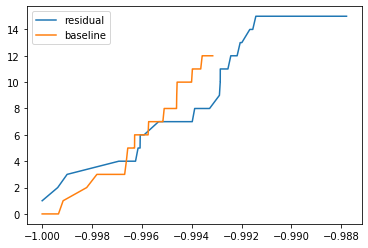

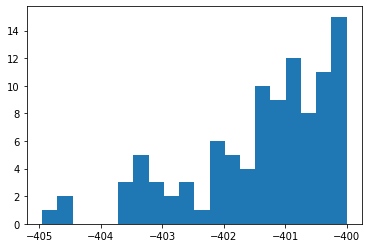

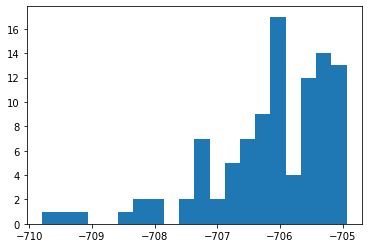

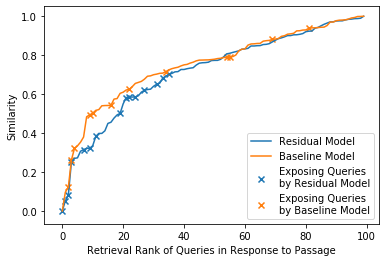

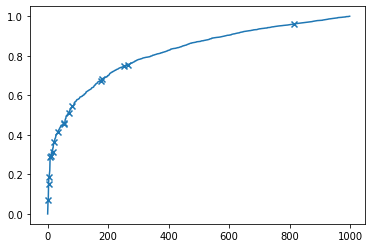

In [470]:
visualization(pid, pid_reverse_mapping, qid_mapping, query_index, query_index_baseline, results, 100)

In [487]:
find_example(results, true_dict_100)

3465899 12
7443838 12
3562283 20
1370992 15
4358620 19
2339406 12
2929174 13
7310719 13
7878306 44
8741596 11
3663038 11
154058 11
3644661 11
219841 13
162589 13
4637002 11
2050041 14
3302253 24
6715480 16
4265227 22
3773315 11
8577419 11
769683 12
2246585 11
1007936 12
4421003 17
4576651 12
393963 12
743201 17
4832029 21
4410270 12
607732 15
7530222 11
5505248 11
6561543 11
3884973 18
1861595 15
989053 11
405996 12
5301821 19
4861694 13
400643 13
488451 11
6158249 15
7570118 17
3039024 19
185604 15
7927032 11
7705030 12
8640196 28
5719709 15
513270 13
4955843 14
1359051 12
8763492 11
3675750 15
73582 12
4823533 18
1344926 12
8293016 11
5763810 17
3328026 18
2776594 13
7334568 13
2924955 25
5241174 11
1624062 20
7170866 13
7087081 14
6321140 12
2173588 15
6981180 13
4035088 11
4974894 14
7125920 21
2293076 11
5136215 11
501560 14
3610952 14
6058924 13
3146976 34
8081041 19
4440976 33
8182961 24
3548402 11
3686907 14
1774998 11
5073976 15
8658503 12
4917638 15
8345809 12
6305123 12
2919

(1131344, 12)

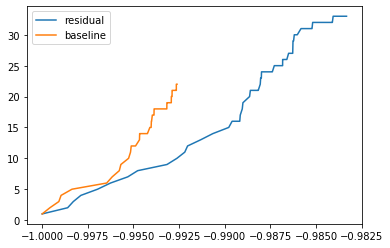

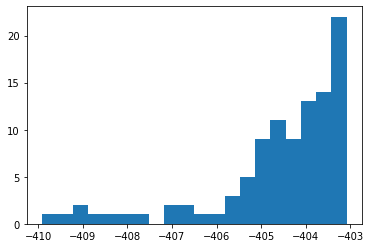

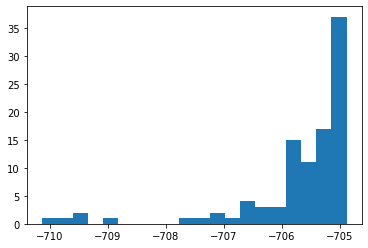

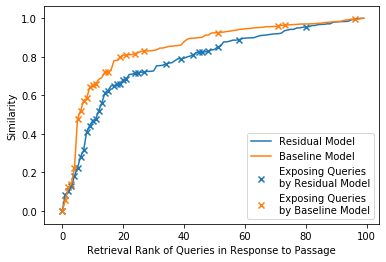

11
3


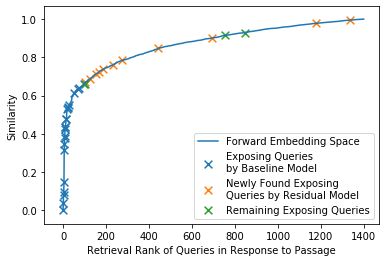

11
3


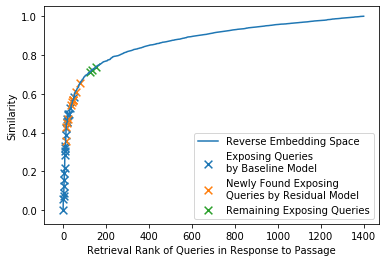

In [531]:
# list(candidates)[100]
visualization(4637002, pid_reverse_mapping, qid_mapping, query_index, query_index_baseline, results, 100)

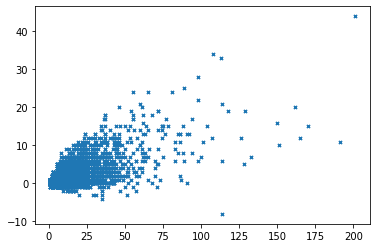

In [422]:
visualize_exposure_size(results, true_dict_100)

22
33
22
33


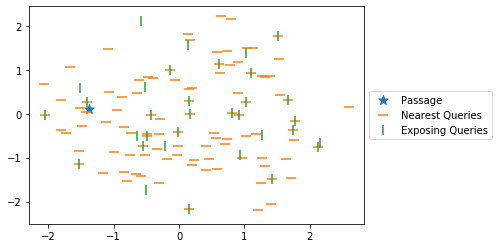

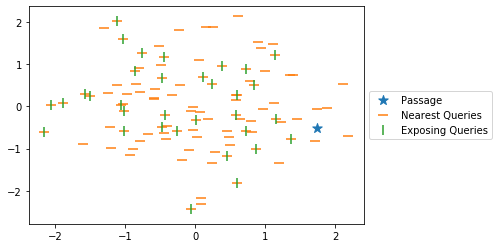

In [532]:
pca_visualization(query_pca_baseline, passages_pca_baseline, query_pca_residual, passages_pca_residual, 4637002, results, true_dict_100)

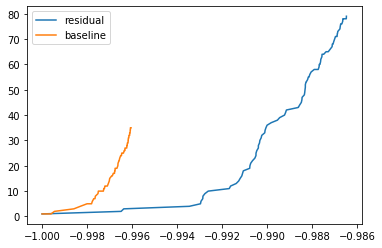

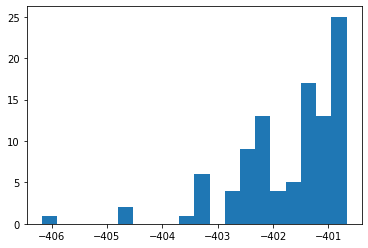

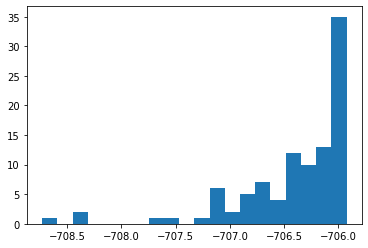

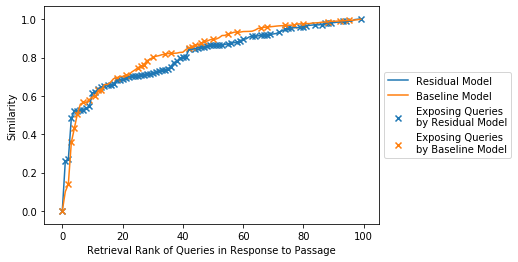

In [392]:
visualization(7878306, pid_reverse_mapping, qid_mapping, query_index, query_index_baseline, results, 100)

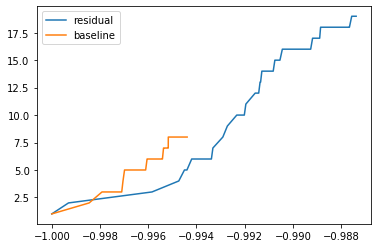

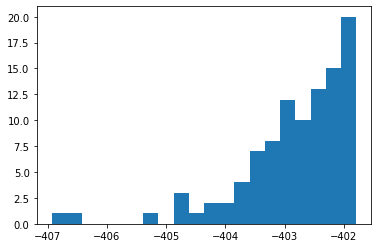

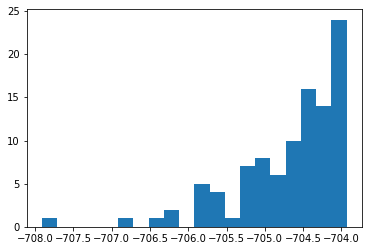

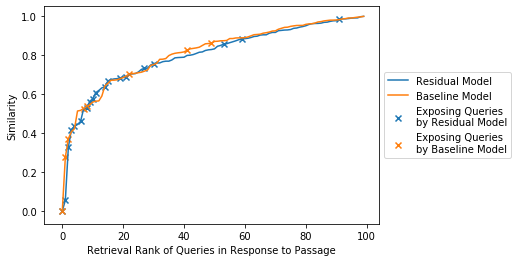

In [393]:
visualization(1080710, pid_reverse_mapping, qid_mapping, query_index, query_index_baseline, results, 100)

In [445]:
def display_set_passages(display_set, ranking, pid):
    for qid in display_set:
        print(ranking[pid][qid],queries_text_dict[qid])
        print("---------------------------------------------------")

In [446]:
def seperate_qids(results, true_dict_100, pid):
    baseline_rank = results["forward_baseline_rank_test"]
    residual_rank = results["pred_rank_test"]
    base_set = delete_zeros(baseline_rank[pid])
    residual_set = delete_zeros(residual_rank[pid])
    total_set = delete_zeros(true_dict_100[pid])
    print("Baseline: {}".format(base_set))
    display_set_passages(base_set, baseline_rank, pid)
    print("Passage:\n{}".format(passages_text_dict[pid]))
    print("Newly found: {}".format(residual_set-base_set))
    display_set_passages(residual_set-base_set, residual_rank, pid)
    print("Loss: {}".format(base_set-residual_set))
    display_set_passages(base_set-residual_set, baseline_rank, pid)
    print("Remaining: {}".format(total_set-residual_set))
    display_set_passages(total_set-residual_set, true_dict_100, pid)

In [434]:
def load_tsv_dict(path):
    with open(path) as file:
        line = file.readline()
        my_dict = {}
        while line:
            tokens = line.split("\t")
            indexid = int(tokens[0])
            text = tokens[1].rstrip()
            my_dict[indexid] = text
            line = file.readline()
    return my_dict

In [431]:
QUERIES_TEXT_PATH = "/datadrive/jianx/data/queries.train.tsv"
PASSAGES_TEXT_PATH = "/datadrive/jianx/data/collection.tsv"
queries_text_dict = load_tsv_dict(QUERIES_TEXT_PATH)
passages_text_dict = load_tsv_dict(PASSAGES_TEXT_PATH)

In [489]:
seperate_qids(results, true_dict_100, 4637002)

Baseline: {639360, 177539, 392968, 131216, 814748, 129577, 391085, 514483, 135355, 761532, 395458, 391113, 560225, 390377, 757229, 757232, 654452, 446068, 639353, 639354, 639355, 639356}
89 what does idiot mean
---------------------------------------------------
10 easy idiom definition
---------------------------------------------------
6 implies definition
---------------------------------------------------
15 definition idiom
---------------------------------------------------
63 what is the definition of axiom?
---------------------------------------------------
62 define: idiomatic
---------------------------------------------------
79 idiomatic phrase definition
---------------------------------------------------
15 the best definition of an idiom is
---------------------------------------------------
17 definition of idiom
---------------------------------------------------
39 what is it idiom
---------------------------------------------------
15 indicative definition grammar
-

## Visualize examples

In [24]:
dim = query_new_np.shape[1]
query_index = faiss.IndexFlatIP(dim)
query_index.add(query_new_np)
query_index_baseline = faiss.IndexFlatIP(dim)
query_index_baseline.add(query_np)

In [25]:
qid_reverse_mapping = {v:k for k,v in qid_mapping.items()}

In [34]:
append_dict_path = "/datadrive/ruohan/final_results_list/append.dict"
residual_dict_path = "/datadrive/ruohan/final_results_list/residual.dict"
append_results = obj_reader(append_dict_path)
residual_results = obj_reader(residual_dict_path)

In [302]:
def extract_examples(pid, results, pid_reverse_mapping, qid_reverse_mapping, query_index, residual_results, query_index_baseline, true_dict_100, n=200):
    baseline_rank = results["forward_baseline_rank_test"]
    residual_rank = results["pred_rank_test"]
    baseline_labels = baseline_rank[pid]
    residual_labels = residual_rank[pid]
    true_dict = {qid_reverse_mapping[q]:rank for q,rank in true_dict_100[pid].items()}
    pid_map = pid_reverse_mapping[pid]
    distance_residual, near_qids = query_index.search(np.array([passage_new_np[pid_map,:]]),n)
    distance_baseline, near_qids_baseline = query_index_baseline.search(np.array([passage_np[pid_map,:]]),n)
    residual_set = set(near_qids[0])
    baseline_set = set(near_qids_baseline[0])
    overlap_set = residual_set.intersection(baseline_set)
    residual = [[],[],[],[]]
    highest = 101
    for i, qid in enumerate(near_qids[0]):
        if qid in true_dict:
            if qid in overlap_set:
                residual[0].append(i+1)
                residual[1].append(highest-true_dict[qid])
            else:
                residual[2].append(i+1)
                residual[3].append(highest-true_dict[qid])                
    residual.append(residual_results["model_nrbp"][pid])
    baseline = [[],[],[],[]]
    for i, qid in enumerate(near_qids_baseline[0]):
        if qid in true_dict:
#             baseline[0].append(i+1)
#             baseline[1].append(true_dict[qid])
            if qid in overlap_set:
                baseline[0].append(i+1)
                baseline[1].append(highest-true_dict[qid])
            else:
                baseline[2].append(i+1)
                baseline[3].append(highest-true_dict[qid])                    
    baseline.append(residual_results["baseline_nrbp"][pid])
    return baseline, residual

In [303]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

In [308]:
def plot_examples(pid_list, results, pid_reverse_mapping, qid_reverse_mapping, query_index, query_index_baseline, true_dict_100, residual_results, n=200):
    plt.rcParams.update({'font.size': 21})
#     plt.rc('axes',edgecolor='k')
    fig, axs = plt.subplots(2*len(pid_list), 1,figsize=(15,3*len(pid_list)))
    i = 0
#     cmap = ["tab:blue","tab:orange","tab:green","tab:purple"]
    cmap = ["black","darkblue","black","darkblue"]
    for j,pid in enumerate(pid_list):
        baseline, residual = extract_examples(pid, results, pid_reverse_mapping, qid_reverse_mapping, query_index, 
                                              residual_results, query_index_baseline, true_dict_100, n)
#         axs[i].vlines(baseline[0],[0]*len(baseline[0]),baseline[1], color="black",linestyle=":")
#         axs[i].vlines(baseline[2],[0]*len(baseline[2]),baseline[3], color="black")
        axs[i].vlines(baseline[0],[0]*len(baseline[0]),baseline[1], color=cmap[i//2],linestyle=":")
        axs[i].vlines(baseline[2],[0]*len(baseline[2]),baseline[3], color=cmap[i//2])
        axs[i].tick_params(axis='x', colors=cmap[i//2])
        axs[i].tick_params(axis='y', colors=cmap[i//2])
        axs[i].spines['bottom'].set_color(cmap[i//2])
        axs[i].spines['top'].set_color(cmap[i//2]) 
        axs[i].spines['right'].set_color(cmap[i//2])
        axs[i].spines['left'].set_color(cmap[i//2])
#         print(baseline[0], baseline[2])
        axs[i].set_xlim(1,n)
        axs[i].set_ylim(0,100)
        axs[i].set_title("ANN-Orig Passage {}: ".format(j+1) + str(np.round(baseline[4],3)), loc='right',color=cmap[i//2])
        axs[i].set_xticks([])
#         axs[i].set_ylabel('Baseline')
        i += 1
        if i != len(pid_list) * 2 - 1:
            axs[i].set_xticks([])
#         axs[i].vlines(residual[0],[0]*len(residual[0]),residual[1], color="darkblue",linestyle=":")
#         axs[i].vlines(residual[2],[0]*len(residual[2]),residual[3], color="darkblue")
        axs[i].vlines(residual[0],[0]*len(residual[0]),residual[1], color=cmap[i//2],linestyle=":")
        axs[i].vlines(residual[2],[0]*len(residual[2]),residual[3], color=cmap[i//2])
        axs[i].tick_params(axis='x', colors=cmap[i//2])
        axs[i].tick_params(axis='y', colors=cmap[i//2])
        axs[i].spines['bottom'].set_color(cmap[i//2])
        axs[i].spines['top'].set_color(cmap[i//2]) 
        axs[i].spines['right'].set_color(cmap[i//2])
        axs[i].spines['left'].set_color(cmap[i//2])
        axs[i].set_xlim(1,n)
        axs[i].set_ylim(0,100)
#         axs[i].set_ylabel('Residual')
        axs[i].set_title("Residual Passage {}: ".format(j+1) + str(np.round(residual[4],3)), loc='right',color=cmap[i//2])
        i += 1
#         fig.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=1, hspace=0)
    fig.tight_layout(pad=0)
    plt.savefig("event.pdf",dpi=2400)
    plt.show()
    

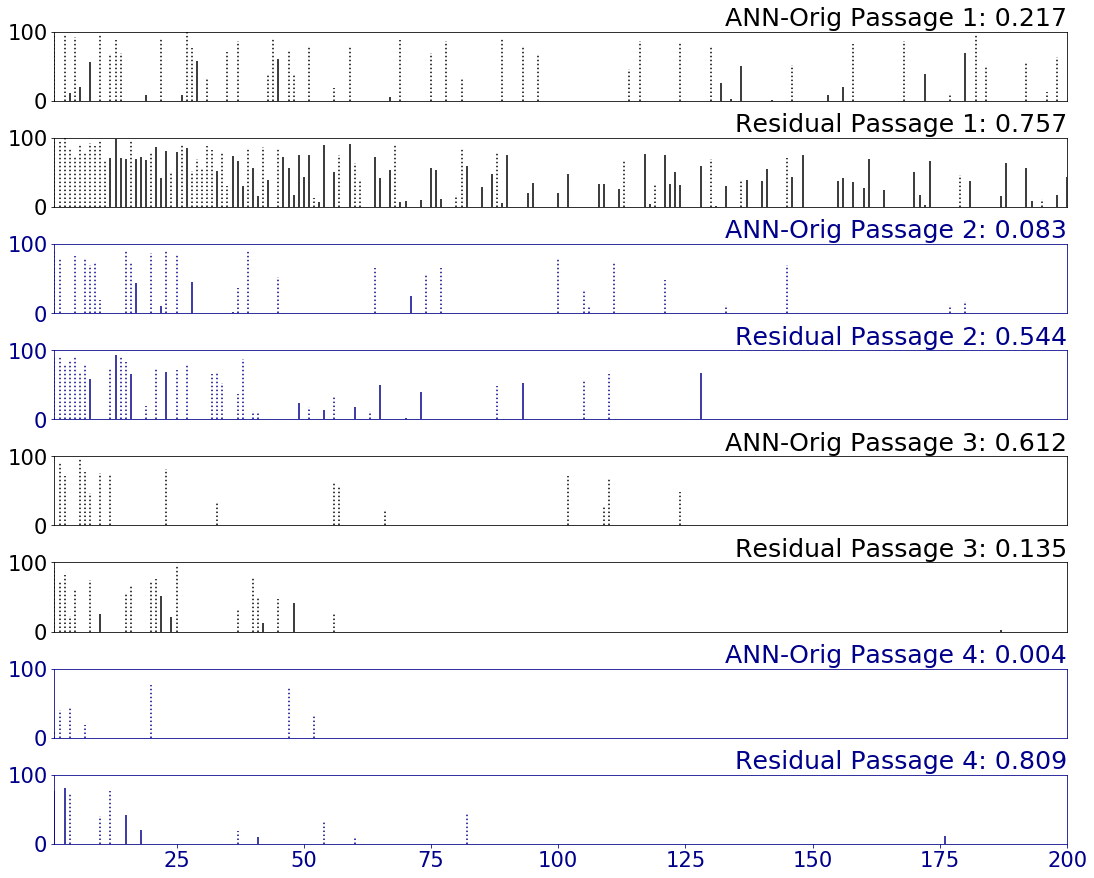

In [309]:
plot_examples([7878306,1007936,4104028,5714566], results, pid_reverse_mapping, qid_reverse_mapping, query_index, query_index_baseline, true_dict_100, residual_results, n=200)

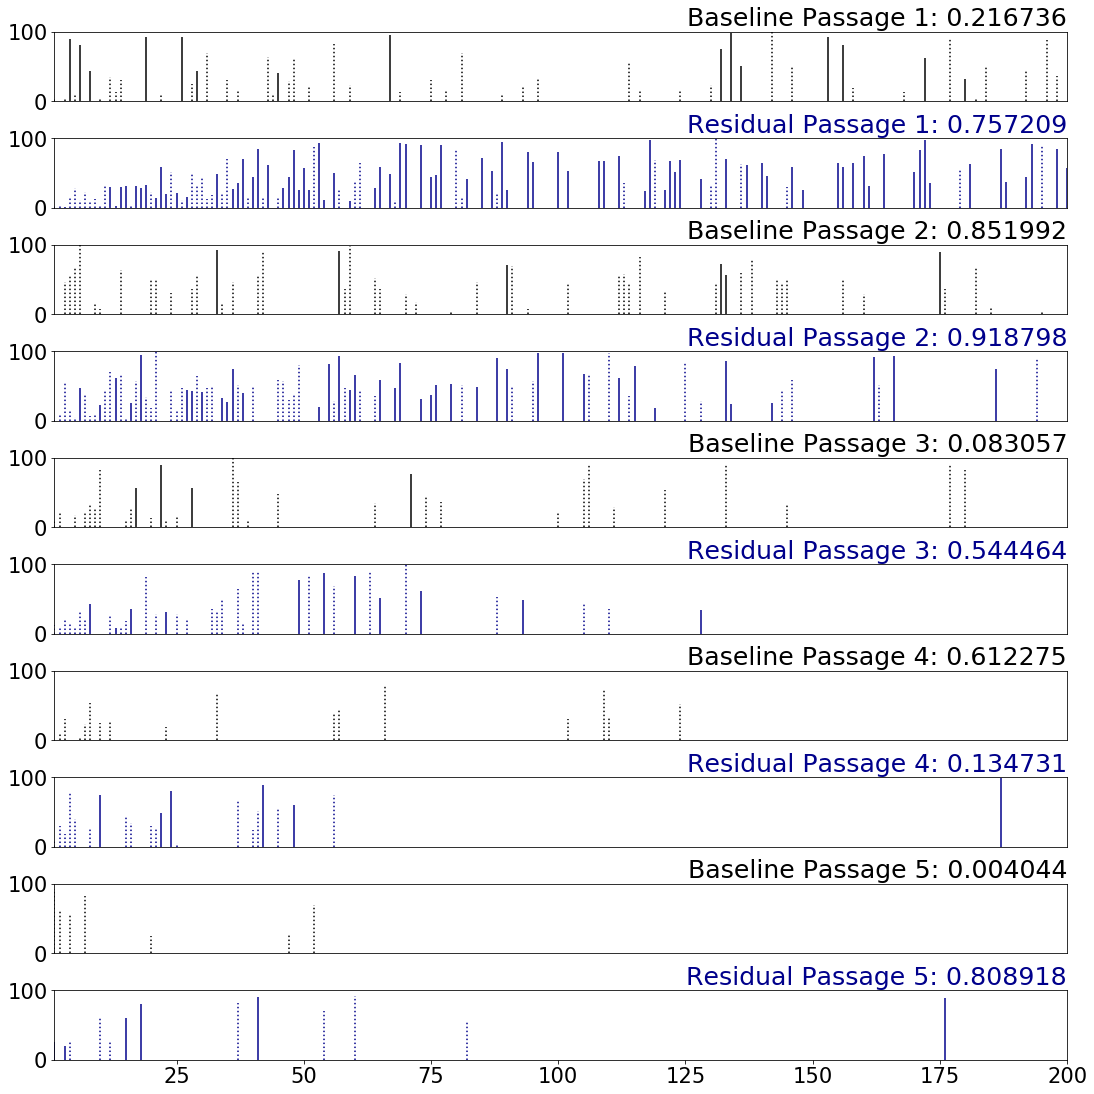

In [208]:
plot_examples([7878306,3146976,1007936,4104028,5714566], results, pid_reverse_mapping, qid_reverse_mapping, query_index, query_index_baseline, true_dict_100, residual_results, n=200)
# 6808918,8741596,7943105

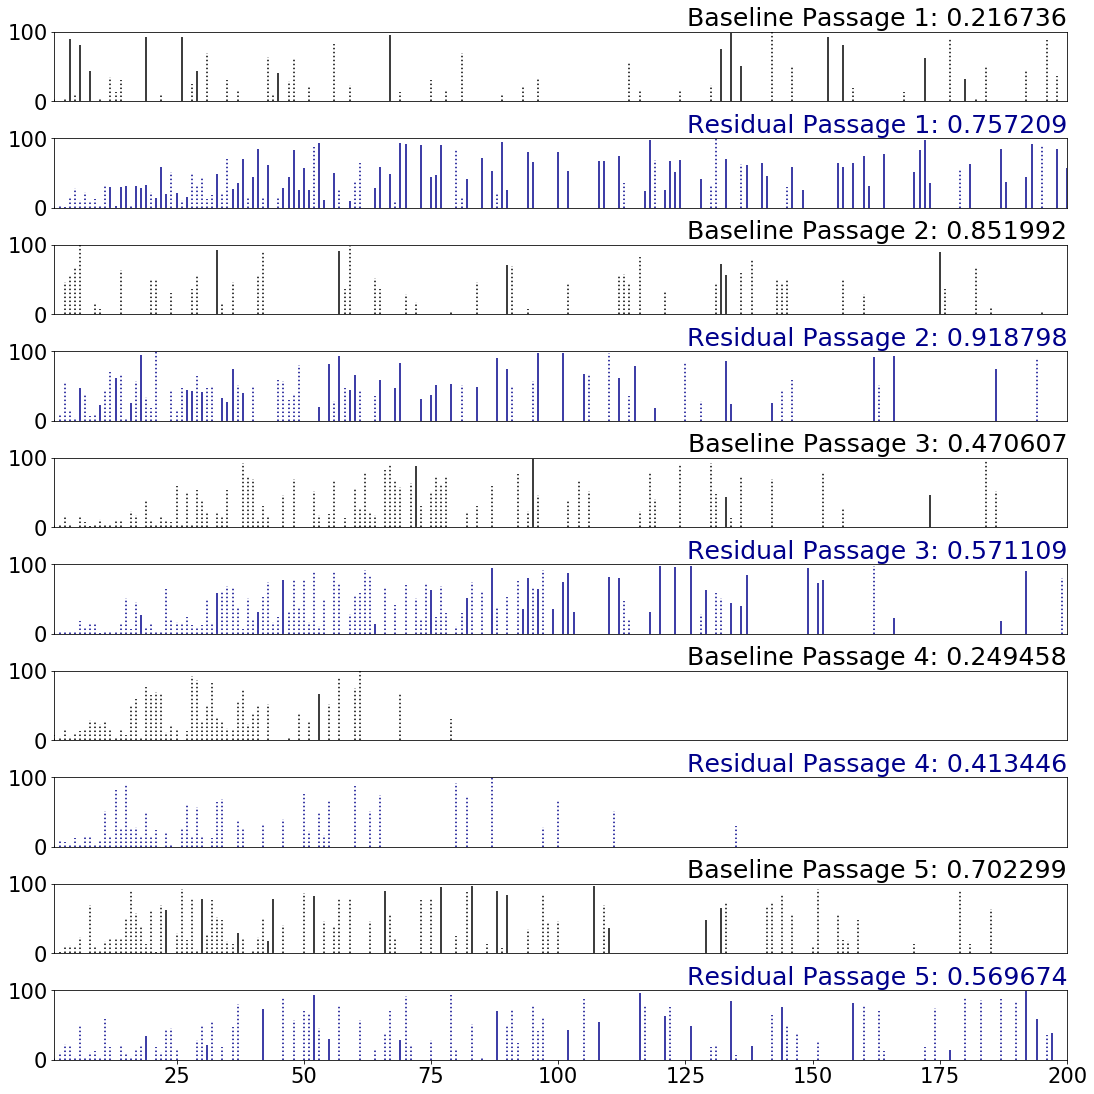

In [198]:
plot_examples([7878306,3146976,4358620,2883491,6715844], results, pid_reverse_mapping, qid_reverse_mapping, query_index, query_index_baseline, true_dict_100, residual_results, n=200)

In [144]:
def find_metric_example(residual_results, true_dict_100, upper, lower):
    baseline = residual_results["baseline_nrbp"]
    model = residual_results["model_nrbp"]
    for pid, metric in model.items():
        if metric-baseline[pid] > lower and metric-baseline[pid] <= upper:
            print(pid, len(true_dict_100[pid]), metric, baseline[pid])
find_metric_example(residual_results, true_dict_100, 1, 0.7)

6808918 6 0.999762049070671 0.05816297344991735
8283996 2 0.7290000000000001 9.334269685315479e-20
1597615 3 0.8099999999390506 1.6000592965137516e-11
7039075 2 0.905775075987842 0.030607634772550414
7388862 1 1.0 0.12157665459056935
4779560 12 0.8015118207978311 0.07269674900580227
8299996 1 0.9 0.18530201888518416
4449682 5 0.9999999807304155 7.397804201994008e-12
5245703 6 0.7292379988122838 0.003418601883479518
1508038 2 0.8100000000000778 3.683453542178852e-13
264434 8 0.9057560851071598 0.16259272840395617
8769563 3 1.0 0.12157665459056935
8661970 1 0.9 0.03433683820292515
613480 1 1.0 0.025031555049932437
5714566 14 0.8089182806050079 0.004043666735650384
5379472 1 1.0 0.0
3338978 1 1.0 0.030903154382632636
5498521 1 1.0 0.2287679245496101
5952408 5 1.0 0.10475250030703444
289490 1 0.81 0.0
7775956 7 0.9729058560597127 0.009292881477286486
632328 4 0.893786487675971 0.0071171110828286
6757965 1 0.81 0.020275559590445275
6646052 9 0.9999999999739693 0.12264251734555827
8239187 4 

3078799 10 0.9999999999990514 0.016308343753966104
4554933 14 0.9229971473354583 0.09902541549561292
4324355 2 0.9999999999996201 0.00010449567633173578
2061160 11 0.9999999989649435 0.00010449569951722455
7277391 6 0.9701954919346224 0.10847309937936311
8421087 2 0.9999999892711651 0.03815205009380767
5811337 3 0.9999999999999976 0.18530201888518177
5360778 5 1.0 0.0717897987691853
7290127 2 0.9000000000110594 0.0027389275021968227
3096527 1 1.0 0.20589113209464907
8198093 1 1.0 0.0
6839824 1 1.0 0.0
2310298 1 1.0 0.022528399544939195
4487148 14 0.8999776860218217 0.052334010741597034
6986169 3 0.9999938097759431 0.0008594985540089333
5066964 1 0.9 0.0
6094811 5 0.9999121865554405 0.0008781344559998483
884052 6 0.8099999999999971 3.277879207509296e-17
657506 1 0.9 0.00636268544113595
2590663 2 0.9 1.4242965218071715e-24
8379702 3 0.9995244687073505 0.024987631478973548
1120577 1 1.0 0.16677181699666577
8282701 7 0.8100837013597965 0.052495959761979315
7264646 4 0.8999994129201068 0.16

6419028 2 0.8999999613762069 4.7683695356690495e-07
1439231 2 0.8999999999837857 0.001996678131207194
5519766 1 0.9 0.0
8357753 1 0.81 8.464149782874062e-05
5073047 5 0.999915279218528 0.0005086567110300615
5527542 3 0.9003704425814 0.0030089524377894237
773806 1 0.81 0.0
5538518 2 0.8999999951720241 0.0
5878412 1 1.0 0.0
6565789 1 0.81 0.0008595044557171441
8832760 2 0.8993716058960434 0.0
7029980 15 0.9966803425892042 0.13699788986525657
5104535 16 0.8932884166894464 0.00015151887809927033
8165735 9 0.8099944382104639 0.004174529254190846
3524712 8 0.807327328509242 6.392842048477883e-05
4433414 1 1.0 0.0
3081033 1 0.81 0.09847709021836118
7730696 6 0.8932687614490175 5.261628587832547e-06
5130583 3 1.0 0.16677181699666613
4565967 1 1.0 0.0
827118 17 0.8775411609215982 0.08014946331943067
953335 1 1.0 0.20589113209464907
7417650 1 0.9 0.0011790184577738603
1748748 3 1.0 0.1742737721510232
4468550 6 0.9 4.0483766022843375e-05
7871857 2 0.9007395873880889 0.0038925652004671084
8005146 

1140665 1 1.0 0.0
6128590 1 1.0 0.2541865828329001
7382466 1 1.0 0.0
1609784 2 0.8099999917441613 0.0007735539686487612
7395586 2 0.81 0.00021847450052839255
6494244 12 0.998029026776841 0.08005228426878244
150578 2 0.9000000000006911 0.00021847450101911419
3102974 4 0.9996666016767405 0.0057192065307435655
7537099 4 0.9000000226497628 0.10941898148540355
623985 1 0.81 0.0009550049507968268
1415366 2 1.0 3.571641803400296e-19
5731055 1 1.0 0.0
1084304 4 0.8999999994949263 0.006362685851786331
3806090 1 1.0 0.0
4376434 3 0.8099999160804309 0.0581497320487622
4264969 2 0.8999999999990974 0.18530201888635417
6194766 1 1.0 0.2541865828329001
4152224 12 0.9998920827209447 0.09007635989516168
3930355 1 1.0 0.0
2120919 1 0.81 0.047101286972462485
77449 7 0.999999999983076 0.25418658857307
4271785 1 1.0 0.09847709021836118
1220665 1 1.0 0.005726416897022355
3259106 3 0.8100000001516128 1.4363877232356931e-05
3039573 1 1.0 0.0
4401458 3 0.7289999999998562 0.00969773729787611
6329975 1 1.0 0.000

In [80]:
def find_example(results, true_dict):
    baseline_rank = results["forward_baseline_rank_test"]
    residual_rank = results["pred_rank_test"]   
    diff = 0
    example = None
    for pid, ranks in baseline_rank.items():
        total = len(true_dict.get(pid, []))
        base = len(delete_zeros(ranks))
        residual = len(delete_zeros(residual_rank[pid]))
        if base > total or residual > total:
            print("Error")
#         print(residual - base)
        if residual - base < 0 :
            print(pid, residual-base)
            example = pid
            diff = residual - base
    return example, diff
find_example(results, true_dict_100)

2883491 -3
5071514 -1
7223372 -1
7142659 -1
7040127 -1
6715844 -8
7532094 -1
1664582 -1
6148568 -1
2747405 -1
7512149 -2
2912822 -2
7800802 -1
4637449 -1
3077087 -1
39434 -1
8582163 -1
7921602 -1
2641495 -1
601353 -1
2882756 -2
2912324 -1
5533722 -1
8487169 -1
6020985 -2
7756908 -1
3688853 -1
3925474 -1
7385165 -1
6440070 -1
2303366 -1
8430731 -1
1979664 -1
1597393 -1
6209767 -1
1317682 -1
1449531 -1
5886952 -1
7931798 -1
6018449 -1
7540279 -1
4261973 -1
2700678 -1
3724397 -1
1012851 -1
6461447 -1
3756397 -1
1963825 -1
6308954 -1
5514272 -1
3523287 -2
5823122 -1
6747056 -1
3842980 -1
224972 -1
112195 -2
5478643 -1
4522604 -1
2845497 -2
6505073 -1
6517073 -1
5628819 -1
3404344 -4
593429 -1
4832437 -1
5972672 -1
432803 -1
4370861 -1
6185321 -1
5537085 -1
1569034 -1
5799274 -1
6409042 -1
4733151 -1
7481177 -1
3175792 -1
6126780 -1
5797121 -3
1539261 -2
4294711 -1
1979091 -1
5726292 -1
1197854 -1
1025932 -1
613773 -1
5297004 -1
1563819 -1
2715291 -1
1127020 -1
1180140 -1
5366819 -1
955894 

(8718331, -3)